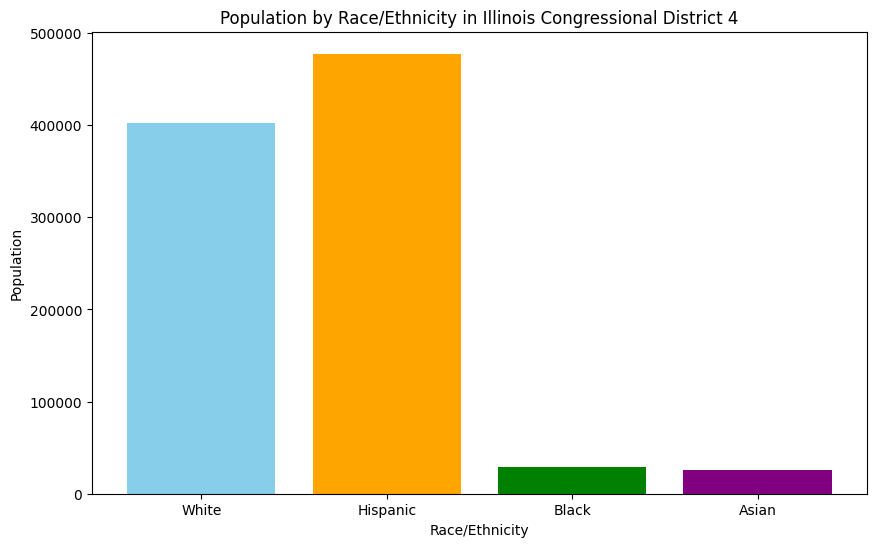

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import requests

# Set up API parameters
api_key = '41d067309a9134ca496c16adfd33605fb13d1cb4'
url = 'https://api.census.gov/data/2019/acs/acs5?'

# Define parameters for the request
params = {
    'get': 'NAME,B01003_001E,B01002_001E,B19013_001E,B02001_002E,B03003_003E,B02001_003E,B02001_005E',
    'for': 'congressional district:*',
    'in': 'state:17',  # Illinois state code
    'key': api_key
}

# Make the request
response = requests.get(url, params=params)

# Convert to DataFrame
data = response.json()
columns = data[0]
data_df = pd.DataFrame(data[1:], columns=columns)

# Assign appropriate column names
data_df.columns = ['District Name', 'Total Population', 'Median Age', 'Median Income', 'White', 'Hispanic', 'Black', 'Asian', 'State', 'District']

# Convert columns to numeric where applicable
data_df['Total Population'] = pd.to_numeric(data_df['Total Population'])
data_df['Median Age'] = pd.to_numeric(data_df['Median Age'])
data_df['Median Income'] = pd.to_numeric(data_df['Median Income'])
data_df['White'] = pd.to_numeric(data_df['White'])
data_df['Hispanic'] = pd.to_numeric(data_df['Hispanic'])
data_df['Black'] = pd.to_numeric(data_df['Black'])
data_df['Asian'] = pd.to_numeric(data_df['Asian'])

# Filter for Illinois Congressional District 4
district_data = data_df[data_df['District'] == '04']

# Plotting Population by Race/Ethnicity
race_ethnicity = ['White', 'Hispanic', 'Black', 'Asian']

plt.figure(figsize=(10, 6))
plt.bar(race_ethnicity, district_data[race_ethnicity].values.flatten(), color=['skyblue', 'orange', 'green', 'purple'])
plt.title('Population by Race/Ethnicity in Illinois Congressional District 4')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Population')
plt.show()


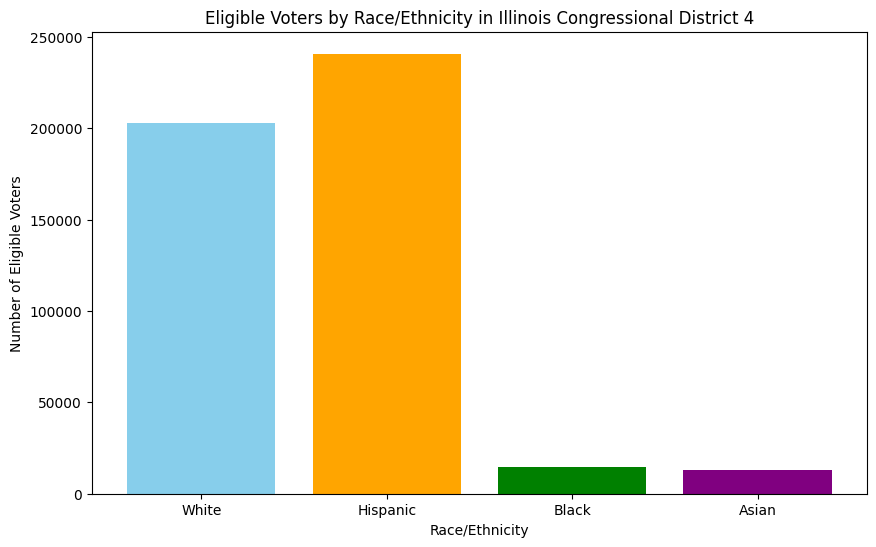

In [ ]:
# Define parameters for the request
params = {
    'get': 'NAME,B01003_001E,B05003_002E,B05003_003E,B02001_002E,B03003_003E,B02001_003E,B02001_005E',
    'for': 'congressional district:*',
    'in': 'state:17',  # Illinois state code
    'key': api_key
}

# Make the request
response = requests.get(url, params=params)

# Convert to DataFrame
data = response.json()
columns = data[0]
data_df = pd.DataFrame(data[1:], columns=columns)

# Assign appropriate column names
data_df.columns = [
    'District Name', 'Total Population', 'Total Citizens', 'Non-Citizens',
    'White', 'Hispanic', 'Black', 'Asian', 'State', 'District'
]

# Convert columns to numeric where applicable
numeric_cols = ['Total Population', 'Total Citizens', 'Non-Citizens', 'White', 'Hispanic', 'Black', 'Asian']
data_df[numeric_cols] = data_df[numeric_cols].apply(pd.to_numeric)

# Filter for Illinois Congressional District 4
district_data = data_df[data_df['District'] == '04']

# Calculate eligible voters by race/ethnicity (assuming all citizens are eligible)
race_ethnicity = ['White', 'Hispanic', 'Black', 'Asian']
eligible_voters = (district_data[race_ethnicity].T / district_data['Total Population'].values[0]) * district_data['Total Citizens'].values[0]

# Plotting Voting Eligibility by Race/Ethnicity
plt.figure(figsize=(10, 6))
plt.bar(race_ethnicity, eligible_voters.values.flatten(), color=['skyblue', 'orange', 'green', 'purple'])
plt.title('Eligible Voters by Race/Ethnicity in Illinois Congressional District 4')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Number of Eligible Voters')
plt.show()

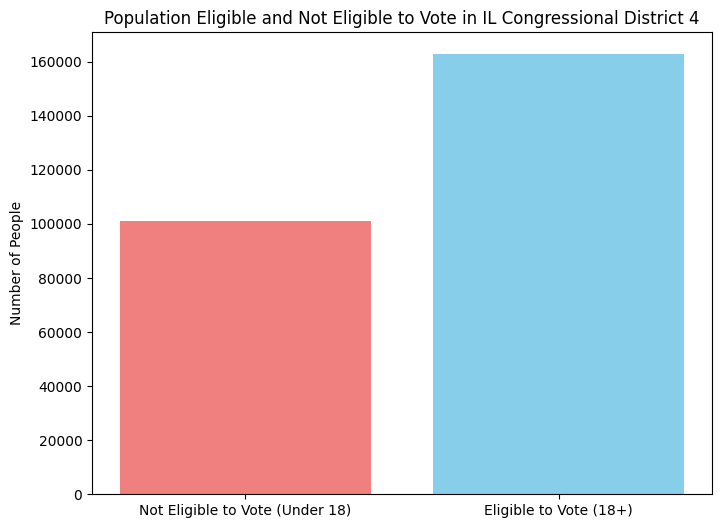

Population Under 18 (Not Eligible): 101221
Population 18+ (Eligible): 162734


In [ ]:
# Define variables for age groups
params = {
    'get': 'NAME,B01001_003E,B01001_004E,B01001_005E,B01001_006E,B01001_007E,B01001_008E,B01001_009E,B01001_010E,B01001_011E,B01001_012E,B01001_013E,B01001_014E,B01001_015E',
    'for': 'congressional district:04',
    'in': 'state:17',
    'key': api_key
}

# Make the request
response = requests.get(url, params=params)
data = response.json()

# Dynamically extract column names from the response
columns = data[0]  # The first row contains column names
data_df = pd.DataFrame(data[1:], columns=columns)  # Use remaining rows as data

# Convert relevant columns to numeric
age_columns = columns[1:-2]  # Exclude 'NAME', 'state', and 'congressional district'
data_df[age_columns] = data_df[age_columns].apply(pd.to_numeric, errors='coerce')

# Calculate total population under 18 and 18+
under_18_columns = ['B01001_003E', 'B01001_004E', 'B01001_005E', 'B01001_006E', 'B01001_007E', 'B01001_008E']
over_18_columns = list(set(age_columns) - set(under_18_columns))

under_18 = data_df[under_18_columns].sum(axis=1).values[0]
over_18 = data_df[over_18_columns].sum(axis=1).values[0]

# Plotting results
labels = ['Not Eligible to Vote (Under 18)', 'Eligible to Vote (18+)']
sizes = [under_18, over_18]
colors = ['lightcoral', 'skyblue']

plt.figure(figsize=(8, 6))
plt.bar(labels, sizes, color=colors)
plt.title('Population Eligible and Not Eligible to Vote in IL Congressional District 4')
plt.ylabel('Number of People')
plt.show()

# Print results
print(f"Population Under 18 (Not Eligible): {under_18}")
print(f"Population 18+ (Eligible): {over_18}")

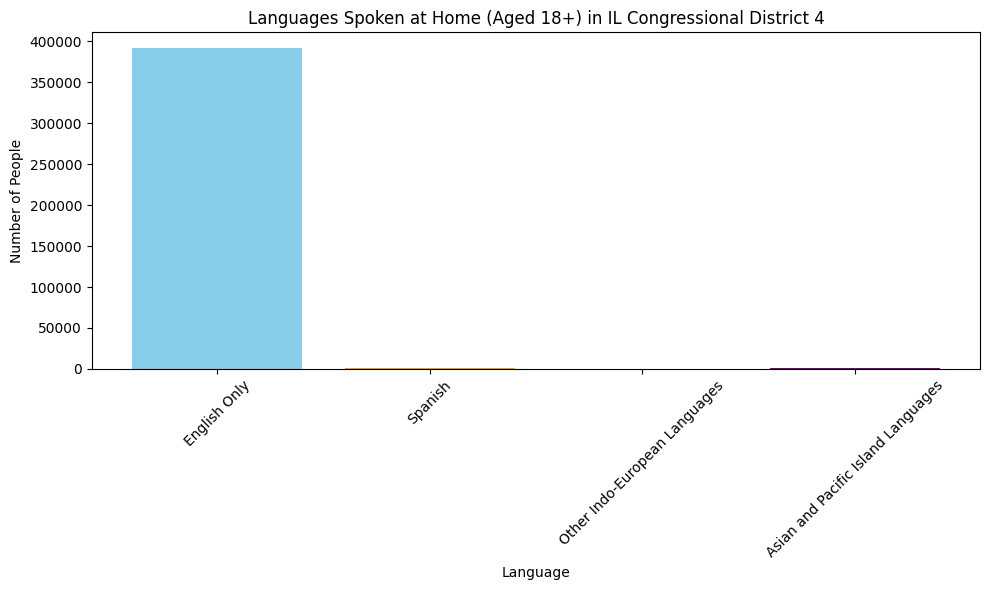

English Only                          391520
Spanish                                 1046
Other Indo-European Languages            179
Asian and Pacific Island Languages      1463
dtype: int64


In [ ]:
# Define variables for language spoken at home by age (18+)
params = {
    'get': 'NAME,B16001_002E,B16001_003E,B16001_006E,B16001_009E,B16001_012E',
    'for': 'congressional district:04',
    'in': 'state:17',
    'key': api_key
}

# Make the request
response = requests.get(url, params=params)
data = response.json()

# Convert to DataFrame
columns = data[0]
data_df = pd.DataFrame(data[1:], columns=columns)

# Rename columns for clarity
data_df.columns = ['District Name', 'Total Population (18+)', 'English Only',
                   'Spanish', 'Other Indo-European Languages',
                   'Asian and Pacific Island Languages',
                   'State', 'District']

# Convert relevant columns to numeric
language_columns = ['English Only', 'Spanish',
                    'Other Indo-European Languages',
                    'Asian and Pacific Island Languages']
data_df[language_columns] = data_df[language_columns].apply(pd.to_numeric)

# Calculate total language populations
language_totals = data_df[language_columns].sum()

# Plotting results
plt.figure(figsize=(10, 6))
plt.bar(language_totals.index, language_totals.values, color=['skyblue', 'orange', 'green', 'purple'])
plt.title('Languages Spoken at Home (Aged 18+) in IL Congressional District 4')
plt.xlabel('Language')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print results
print(language_totals)

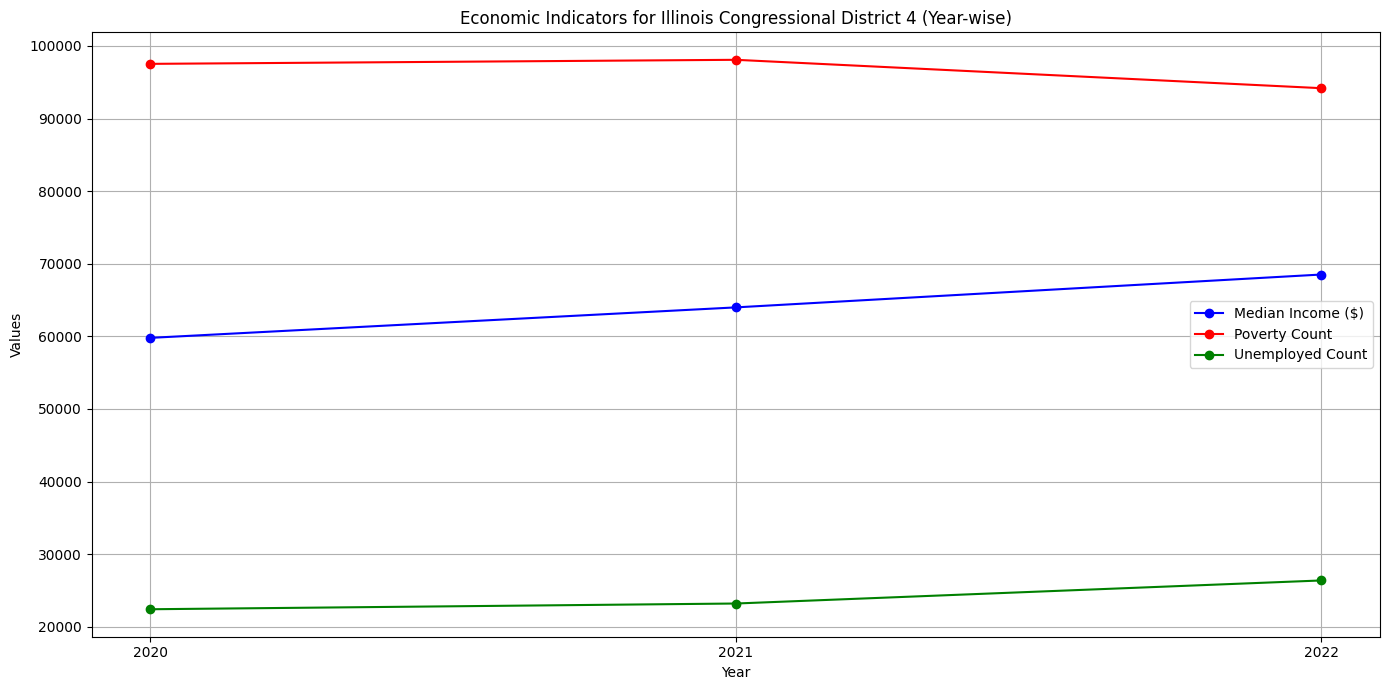

                                                NAME  Median Income ($)  \
0  Congressional District 4 (116th Congress), Ill...              59793   
1  Congressional District 4 (116th Congress), Ill...              63991   
2  Congressional District 4 (118th Congress), Ill...              68516   

   Poverty Count  Unemployed Count state congressional district  Year  
0          97526             22420    17                     04  2020  
1          98084             23210    17                     04  2021  
2          94175             26386    17                     04  2022  


In [ ]:

# Define function to fetch Census data for a specific year
def fetch_census_data(year, api_key):
    url = f"https://api.census.gov/data/{year}/acs/acs5"
    params = {
        'get': 'NAME,B19013_001E,B17001_002E,B23025_005E',
        'for': 'congressional district:04',
        'in': 'state:17',
        'key': api_key
    }
    response = requests.get(url, params=params)
    data = response.json()
    columns = data[0]
    values = data[1]
    return dict(zip(columns, values))


# Fetch data for multiple years
years = [2020, 2021, 2022]
data = []
for year in years:
    year_data = fetch_census_data(year, api_key)
    year_data['Year'] = year
    data.append(year_data)

# Convert to DataFrame
df = pd.DataFrame(data)

# Rename columns for clarity
df.rename(columns={
    'B19013_001E': 'Median Income ($)',
    'B17001_002E': 'Poverty Count',
    'B23025_005E': 'Unemployed Count'
}, inplace=True)

# Convert relevant columns to numeric
numeric_columns = ['Median Income ($)', 'Poverty Count', 'Unemployed Count']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

# Plot the data
plt.figure(figsize=(14, 7))

# Plot Median Income
plt.plot(df['Year'], df['Median Income ($)'], marker='o', label='Median Income ($)', color='blue')

# Plot Poverty Count
plt.plot(df['Year'], df['Poverty Count'], marker='o', label='Poverty Count', color='red')

# Plot Unemployed Count
plt.plot(df['Year'], df['Unemployed Count'], marker='o', label='Unemployed Count', color='green')

# Add titles and labels
plt.title('Economic Indicators for Illinois Congressional District 4 (Year-wise)')
plt.xlabel('Year')
plt.ylabel('Values')
plt.xticks(years)
plt.grid()
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

# Print the DataFrame for reference
print(df)


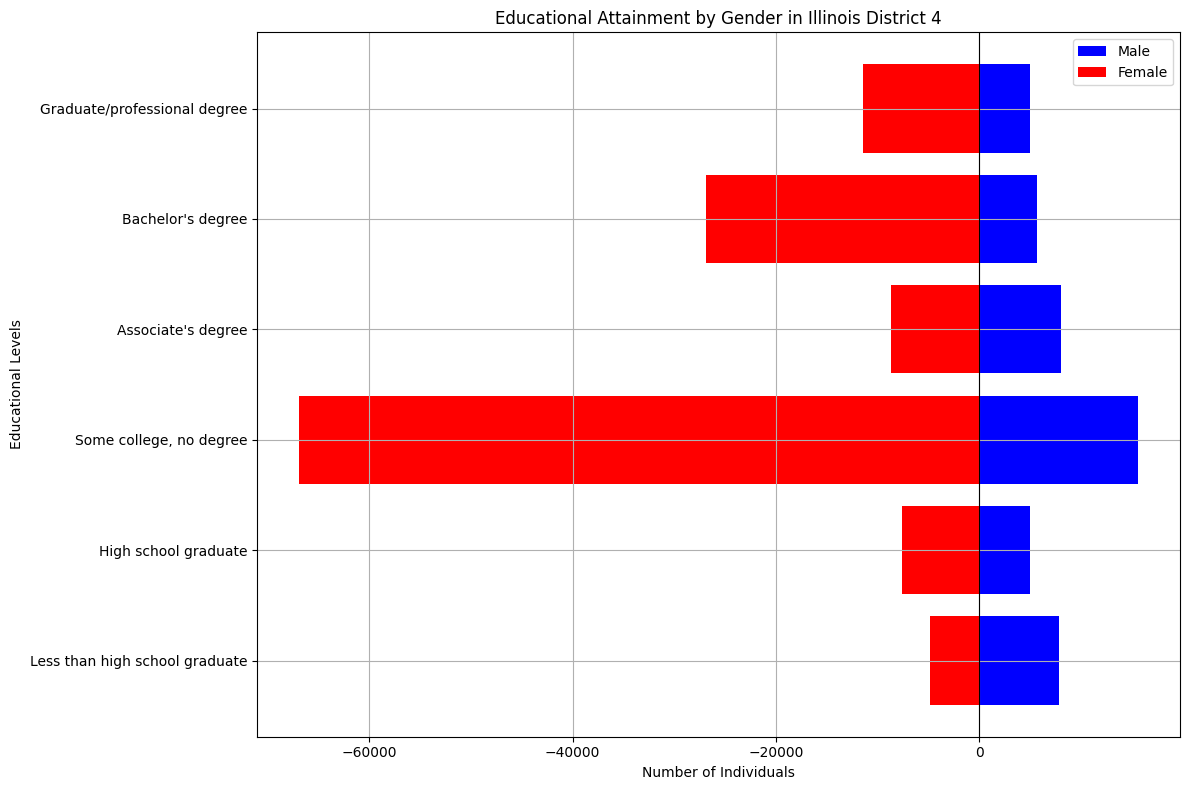

In [ ]:
# Variables for educational attainment by gender (B15002 table)
variables = {
    "B15002_003E": "Male: Less than high school graduate",
    "B15002_004E": "Male: High school graduate (includes equivalency)",
    "B15002_005E": "Male: Some college, no degree",
    "B15002_006E": "Male: Associate's degree",
    "B15002_007E": "Male: Bachelor's degree",
    "B15002_008E": "Male: Graduate or professional degree",
    "B15002_009E": "Female: Less than high school graduate",
    "B15002_010E": "Female: High school graduate (includes equivalency)",
    "B15002_011E": "Female: Some college, no degree",
    "B15002_012E": "Female: Associate's degree",
    "B15002_013E": "Female: Bachelor's degree",
    "B15002_014E": "Female: Graduate or professional degree"
}

# Build query string
query_vars = ",".join(variables.keys())
params = {
    "get": f"NAME,{query_vars}",
    "for": "congressional district:04",
    "in": "state:17",
    "key": api_key
}

# Fetch data from Census API
response = requests.get(url, params=params)
data = response.json()

# Convert to DataFrame
columns = data[0]
values = data[1]
df = pd.DataFrame([values], columns=columns)

# Extract relevant columns and convert to numeric
edu_data = df[list(variables.keys())].astype(int)

# Add descriptions to the data
edu_data.columns = list(variables.values())

# Split into male and female categories
male_data = edu_data.iloc[0, :6].values
female_data = edu_data.iloc[0, 6:].values

# Categories for the pyramid
categories = [
    "Less than high school graduate",
    "High school graduate",
    "Some college, no degree",
    "Associate's degree",
    "Bachelor's degree",
    "Graduate/professional degree"
]

# Create Educational Pyramid plot
plt.figure(figsize=(12, 8))
plt.barh(categories, male_data, color="blue", label="Male")
plt.barh(categories, -female_data, color="red", label="Female")
plt.title("Educational Attainment by Gender in Illinois District 4")
plt.xlabel("Number of Individuals")
plt.ylabel("Educational Levels")
plt.axvline(0, color="black", linewidth=0.8)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

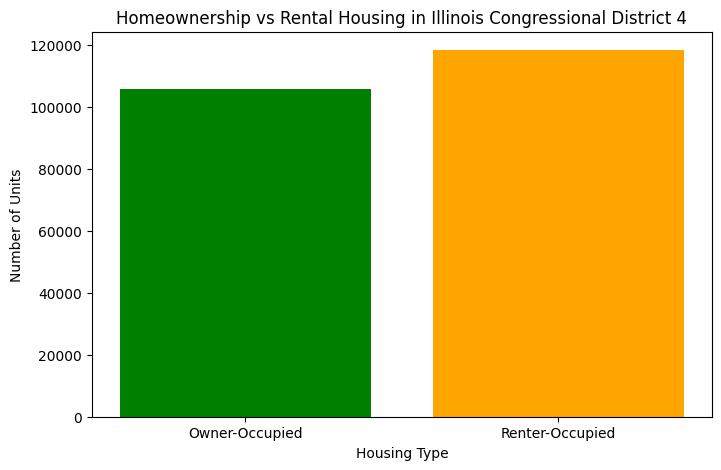

Owner-Occupied Units: 105659
Renter-Occupied Units: 118334


In [ ]:
# Variables for homeownership and rental data (B25003 table)
params = {
    "get": "NAME,B25003_002E,B25003_003E",
    "for": "congressional district:04",
    "in": "state:17",
    "key": api_key
}

# Make the request to the Census API
response = requests.get(url, params=params)
data = response.json()

# Convert to DataFrame
columns = data[0]  # Extract column names from the first row of the response
values = data[1]   # Extract data values from subsequent rows
df = pd.DataFrame([values], columns=columns)

# Rename columns for clarity
df.rename(columns={
    "B25003_002E": "Owner-Occupied Units",
    "B25003_003E": "Renter-Occupied Units"
}, inplace=True)

# Convert relevant columns to numeric
df["Owner-Occupied Units"] = pd.to_numeric(df["Owner-Occupied Units"])
df["Renter-Occupied Units"] = pd.to_numeric(df["Renter-Occupied Units"])

# Extract values for plotting
owner_occupied_units = df["Owner-Occupied Units"].values[0]
renter_occupied_units = df["Renter-Occupied Units"].values[0]

# Prepare data for plotting
labels = ["Owner-Occupied", "Renter-Occupied"]
values = [owner_occupied_units, renter_occupied_units]
colors = ["green", "orange"]

# Plotting a bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=colors)
plt.title("Homeownership vs Rental Housing in Illinois Congressional District 4")
plt.ylabel("Number of Units")
plt.xlabel("Housing Type")
plt.show()

# Print results for verification
print(f"Owner-Occupied Units: {owner_occupied_units}")
print(f"Renter-Occupied Units: {renter_occupied_units}")


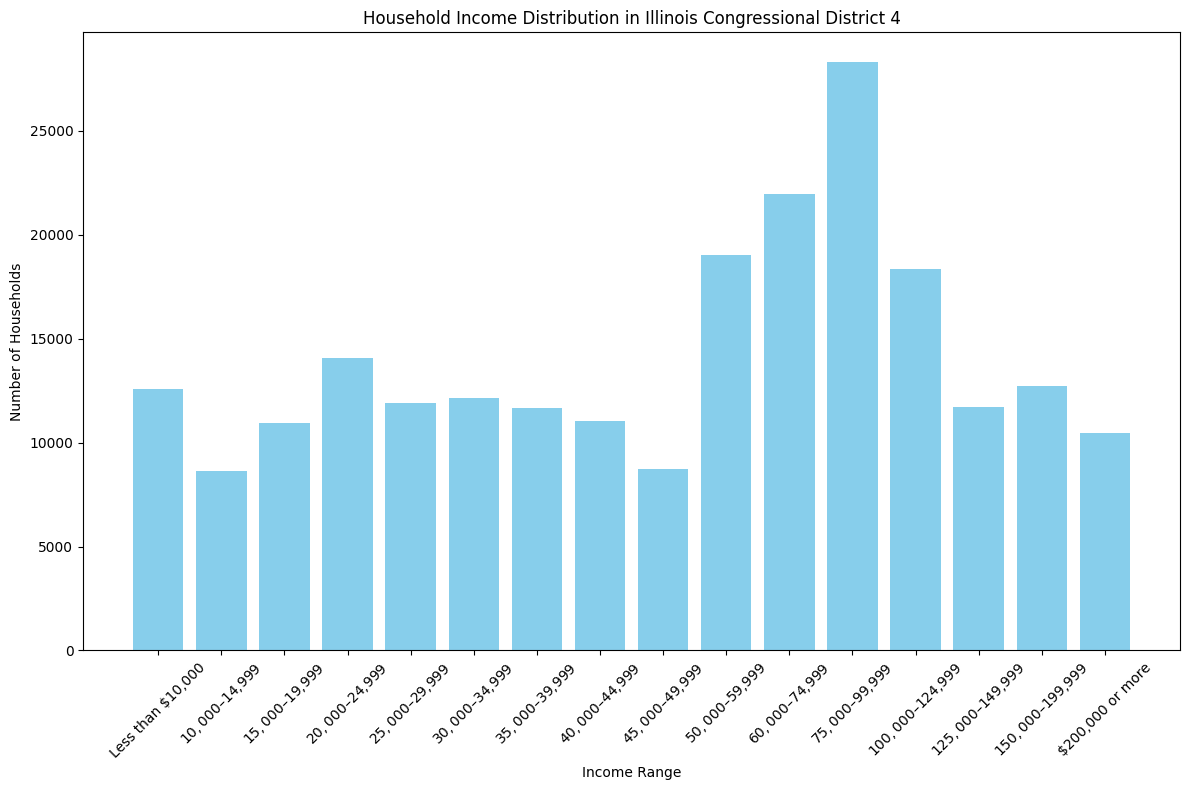

   Less than $10,000  $10,000–$14,999  $15,000–$19,999  $20,000–$24,999  \
0              12553             8620            10915            14053   

   $25,000–$29,999  $30,000–$34,999  $35,000–$39,999  $40,000–$44,999  \
0            11877            12120            11638            11014   

   $45,000–$49,999  $50,000–$59,999  $60,000–$74,999  $75,000–$99,999  \
0             8734            18994            21954            28307   

   $100,000–$124,999  $125,000–$149,999  $150,000–$199,999  $200,000 or more  
0              18345              11731              12695             10443  


In [ ]:
# Variables for household income distribution (B19001 table)
params = {
    "get": "NAME,B19001_002E,B19001_003E,B19001_004E,B19001_005E,B19001_006E,B19001_007E,"
           "B19001_008E,B19001_009E,B19001_010E,B19001_011E,B19001_012E,B19001_013E,"
           "B19001_014E,B19001_015E,B19001_016E,B19001_017E",
    "for": "congressional district:04",
    "in": "state:17",
    "key": api_key
}

# Make the request to the Census API
response = requests.get(url, params=params)
data = response.json()

# Convert to DataFrame
columns = data[0]  # Extract column names from the first row of the response
values = data[1]   # Extract data values from subsequent rows
df = pd.DataFrame([values], columns=columns)

# Rename columns for clarity
income_ranges = [
    "Less than $10,000", "$10,000–$14,999", "$15,000–$19,999", "$20,000–$24,999",
    "$25,000–$29,999", "$30,000–$34,999", "$35,000–$39,999", "$40,000–$44,999",
    "$45,000–$49,999", "$50,000–$59,999", "$60,000–$74,999", "$75,000–$99,999",
    "$100,000–$124,999", "$125,000–$149,999", "$150,000–$199,999", "$200,000 or more"
]
df.columns = ["District Name"] + income_ranges + ["State", "District"]

# Convert income range columns to numeric
df[income_ranges] = df[income_ranges].apply(pd.to_numeric)

# Extract values for plotting
income_values = df[income_ranges].iloc[0].values

# Plotting a bar chart
plt.figure(figsize=(12, 8))
plt.bar(income_ranges, income_values, color="skyblue")
plt.title("Household Income Distribution in Illinois Congressional District 4")
plt.xlabel("Income Range")
plt.ylabel("Number of Households")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print results for verification
print(df[income_ranges])

In [ ]:
pip install pandas matplotlib seaborn geopandas folium

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ----- ---------------------------------- 2.1/16.2 MB 10.7 MB/s eta 0:00:02
   ----------- ---------------------------- 4.7/16.2 MB 11.4 MB/s eta 0:00:02
   ------------------ --------------------- 7.3/16.2 MB 11.9 MB/s eta 0:00:01
   ------------------------- -------------- 10.5/16.2 MB 12.8 MB/s eta 0:00:01
   -------------------------------- ------- 13.1/16.2 MB 12.6 MB/s eta 0:00:01
   ---------------------------------------  16.0/16.2 MB 13.1 MB/s eta 0:00:01
   ---------------------------------------- 16.2/16.2 MB 12.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   ------------------ --------------------- 2.9/6.2 MB 15.2 MB/s eta 0:00:01
   -------------------------------------- - 6.0/6.2 MB 14.7 MB/s eta 0:00:01
   ---------------------------------------- 6.2/6.2 MB 14.1 MB/s eta 0:00:00
  

In [ ]:
!pip install pygris

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/24.5 MB ? eta -:--:--
   ---- ----------------------------------- 2.6/24.5 MB 13.7 MB/s eta 0:00:02
   ------- -------------------------------- 4.7/24.5 MB 11.9 MB/s eta 0:00:02
   ----------- ---------------------------- 7.1/24.5 MB 11.8 MB/s eta 0:00:02
   ---------------- ----------------------- 10.2/24.5 MB 12.5 MB/s eta 0:00:02
   --------------------- ------------------ 13.4/24.5 MB 13.1 MB/s eta 0:00:01
   --------------------------- ------------ 16.8/24.5 MB 13.7 MB/s eta 0:00:01
   -------------------------------- ------- 19.9/24.5 MB 14.0 MB/s eta 0:00:01
   -------------------------------------- - 23.3/24.5 MB 14.2 MB/s eta 0:00:01
   ---------------------------------------- 24.5/24.5 MB 13.7 MB/s eta 0:00:00


In [ ]:
!pip install mapclassify

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import pygris
illinois_counties = pygris.counties(state = "IL")

Using the default year of 2021
Using FIPS code '17' for input 'IL'


<Axes: >

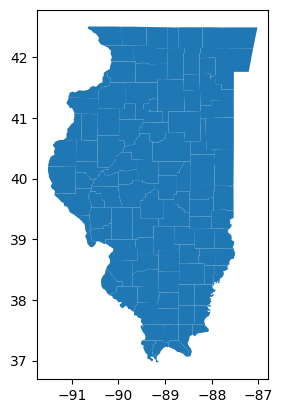

In [ ]:
illinois_counties.plot()

In [ ]:
illinois_counties.explore()

In [ ]:
!pip install cenpy

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   -------------- ------------------------- 1.0/2.8 MB 5.6 MB/s eta 0:00:01
   ------------------------------------- -- 2.6/2.8 MB 6.6 MB/s eta 0:00:01
   ------------------------------------- -- 2.6/2.8 MB 6.6 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 3.8 MB/s eta 0:00:00
  Created wheel for cenpy: filename=cenpy-1.0.1-py3-none-any.whl size=30079 sha256=f7185e11d72b8fd9502f7451c6d8e3ff7e2f72f553286925c3b4b361d2d1ef49
  Stored in directory: c:\users\harsh\appdata\local\pip\cache\wheels\f0\90\02\6460d91fa1c10cf77a1c4140e62ddb8cefc80c2cf1af393671
Successfully built cenpy


In [ ]:
import geopandas as gpd

# Load precinct boundaries
il_districts = gpd.read_file(r"C:\Users\harsh\Downloads\il_cong_adopted_2021\HB 1291 FA #1.dbf")



In [ ]:
print(il_districts.columns)

Index(['ID', 'DISTRICT', 'DISTRICTN', 'geometry'], dtype='object')


In [ ]:
# Check for missing or invalid geometries
print(il_districts.isna().sum())  # Check for missing values
print(il_districts['geometry'].is_valid)  # Check for invalid geometries



ID           0
DISTRICT     0
DISTRICTN    0
geometry     0
dtype: int64
0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
dtype: bool


In [ ]:
# Remove rows with missing or invalid geometries
il_districts = il_districts[il_districts['geometry'].notna()]
il_districts = il_districts[il_districts.is_valid]


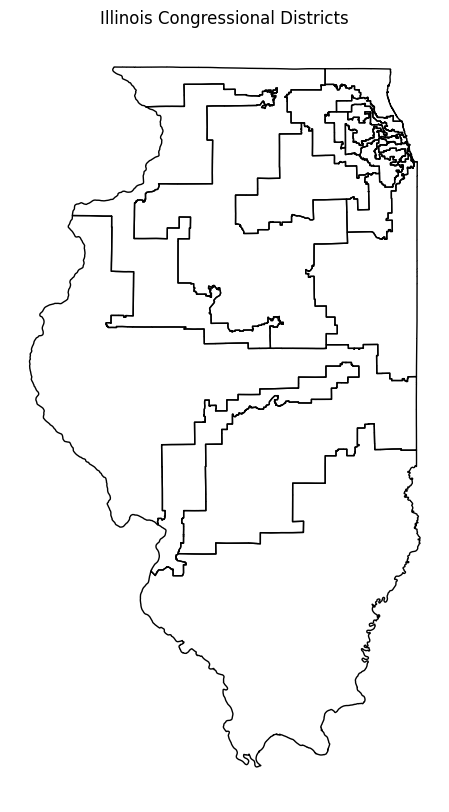

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
il_districts.plot(ax=ax, edgecolor='black', facecolor='none')
plt.title("Illinois Congressional Districts")
plt.axis('off')
plt.show()


In [ ]:
# Check CRS
print(il_districts.crs)

# Set CRS if missing (replace with the correct CRS, e.g., EPSG:4326)
if il_districts.crs is None:
    il_districts = il_districts.set_crs("EPSG:4326")


EPSG:4269


In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from cenpy import products


In [ ]:
# Load precinct boundaries
il_prec_2022_sf = gpd.read_file("il_2022_gen_prec/il_2022_gen_cong_prec/il_2022_gen_cong_prec.shp")
print(len(il_prec_2022_sf))
print(il_prec_2022_sf.head())
print(il_prec_2022_sf.columns)


C:\Users\harsh\AppData\Roaming\Python\Python312\site-packages\pyogrio\raw.py:198: RuntimeWarning: il_2022_gen_prec/il_2022_gen_cong_prec/il_2022_gen_cong_prec.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


9250
                       UNIQUE_ID COUNTYFP  County    Precinct CONG_DIST  \
0      BOONE-:-FLORA 1-(CONG-11)      007   BOONE     FLORA 1        11   
1       COOK-:-7700013-(CONG-11)      031    COOK     7700013        11   
2  DEKALB-:-MAYFIELD 1-(CONG-11)      037  DEKALB  MAYFIELD 1        11   
3  DEKALB-:-SYCAMORE 7-(CONG-11)      037  DEKALB  SYCAMORE 7        11   
4  DEKALB-:-SYCAMORE 9-(CONG-11)      037  DEKALB  SYCAMORE 9        11   

   GCON01DJAC  GCON01OWRI  GCON01RCAR  GCON02DKEL  GCON02RLYN  ...  \
0           0           0           0           0           0  ...   
1           0           0           0           0           0  ...   
2           0           0           0           0           0  ...   
3           0           0           0           0           0  ...   
4           0           0           0           0           0  ...   

   GCON14OWRI  GCON14RGRY  GCON15DLAN  GCON15RMIL  GCON16DHAD  GCON16RLAH  \
0           0           0           0         

In [ ]:
# Check available columns
print(il4_prec_sel.columns)

# Filter for IL-4 precincts
il4_prec = il_prec_2022_sf[il_prec_2022_sf['CONG_DIST'] == 4]

# Select columns, using only the available ones
available_columns = ['UNIQUE_ID', 'COUNTYFP', 'County', 'Precinct', 'CONG_DIST', 'geometry']
vote_columns = [col for col in il4_prec.columns if col.startswith('GCON04') and col in il4_prec.columns]
il4_prec_sel = il4_prec[available_columns + vote_columns]

# Print the selected columns to verify
print(il4_prec_sel.columns)


NameError: name 'il4_prec_sel' is not defined